# Number of Deaths by Age and Gender 
# Aantal overledenen naar leeftijd en geslacht
# Dataset 4 from rivm.nl/coronavirus-covid-19/grafieken

In [20]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Scrapping the data via BS4
request_data=requests.get('https://www.rivm.nl/coronavirus-covid-19/grafieken').text
soup = BeautifulSoup(request_data,'html.parser')
#print(soup.prettify())
my_table=soup.find_all('script', {'type':"application/json"})
my_table=str(my_table)
my_table=my_table.split("csv") 

In [3]:
table_4 = my_table[1]
table_4 = table_4.replace('\\u0022', '')
table_4 = table_4.split("data:")[0]
table_4 = str(table_4).split(']","pre')[0]
#table_4 = str(table_4).split("ren],")[1]
table_4 = table_4.replace("]", '')
table_4 = table_4.split("[")

In [4]:
df4 = pd.DataFrame([sub.split(",") for sub in table_4])
df4.drop([3], axis=1, inplace=True)
df4.drop([0,1,2],inplace=True)
df4.columns=["Age","Male","Female"]

In [5]:
df4.Male = pd.to_numeric(df4.Male)
df4.Female = pd.to_numeric(df4.Female)
df4.loc[:,"Total"] = df4.Male + df4.Female

In [6]:
df4.head()

,Age,Male,Female,Total
3,0-4,0,0,0
4,5-9,0,0,0
5,10-14,0,0,0
6,15-19,0,0,0
7,20-24,0,0,0


In [7]:
df4.tail()

,Age,Male,Female,Total
18,75-79,331,146,477
19,80-84,372,217,589
20,85-89,324,217,541
21,90-94,109,149,258
22,95+,19,54,73


In [8]:
print(f'Male death number: {str(df4.Male.sum())}')
print(f'Female death number: {str(df4.Female.sum())}')
print(f'Total death number: {str(df4.Male.sum()+df4.Female.sum())}')

Male death number: 1528
Female death number: 981
Total death number: 2509


In [9]:
df4.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_gender_age_NL.csv',  index = True, header=True)

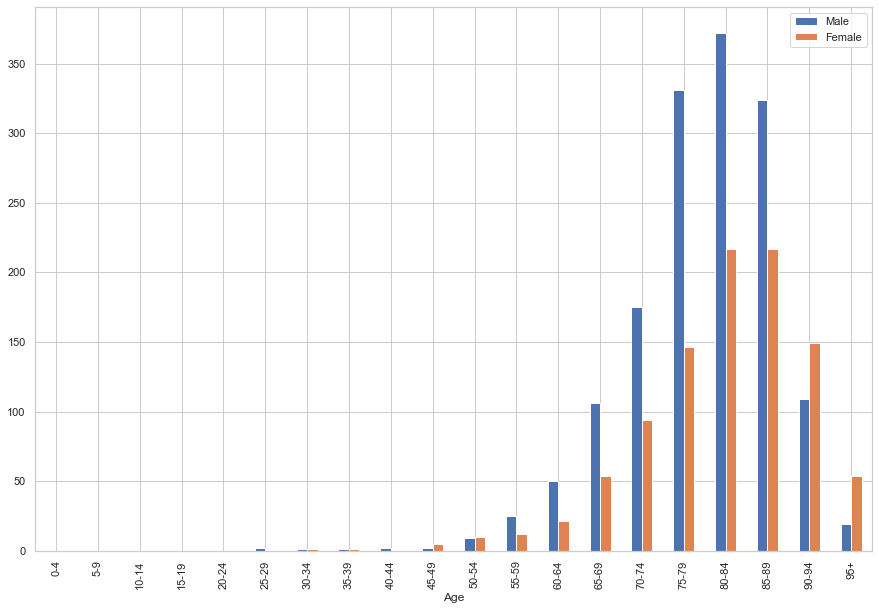

In [18]:
df4.plot(kind='bar', x='Age', y=['Male', 'Female'], grid=True, figsize=(15,10))

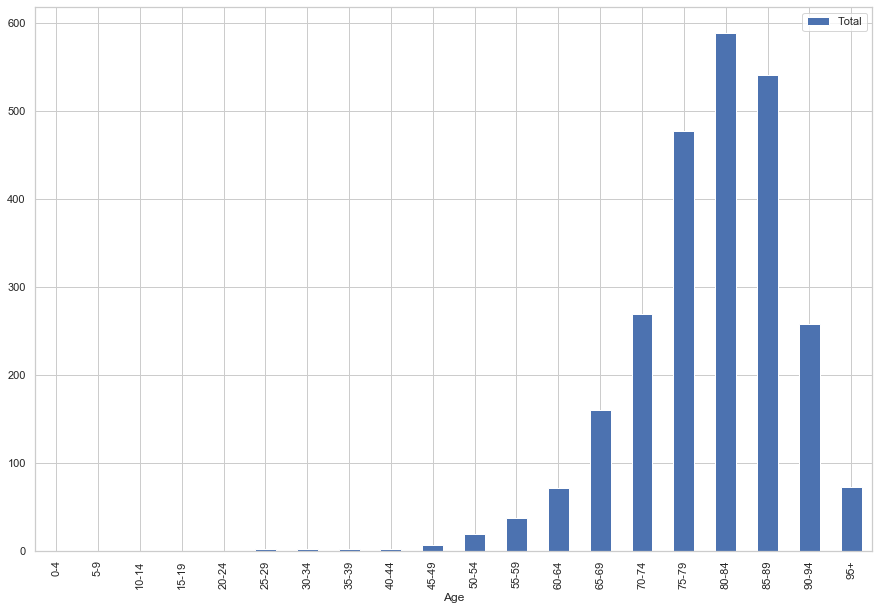

In [19]:
df4.plot(kind='bar', x='Age', y=['Total'], grid=True, figsize=(15,10))

In [35]:
df5 = pd.melt(df4, id_vars="Age", var_name="Sex", value_name="Total")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

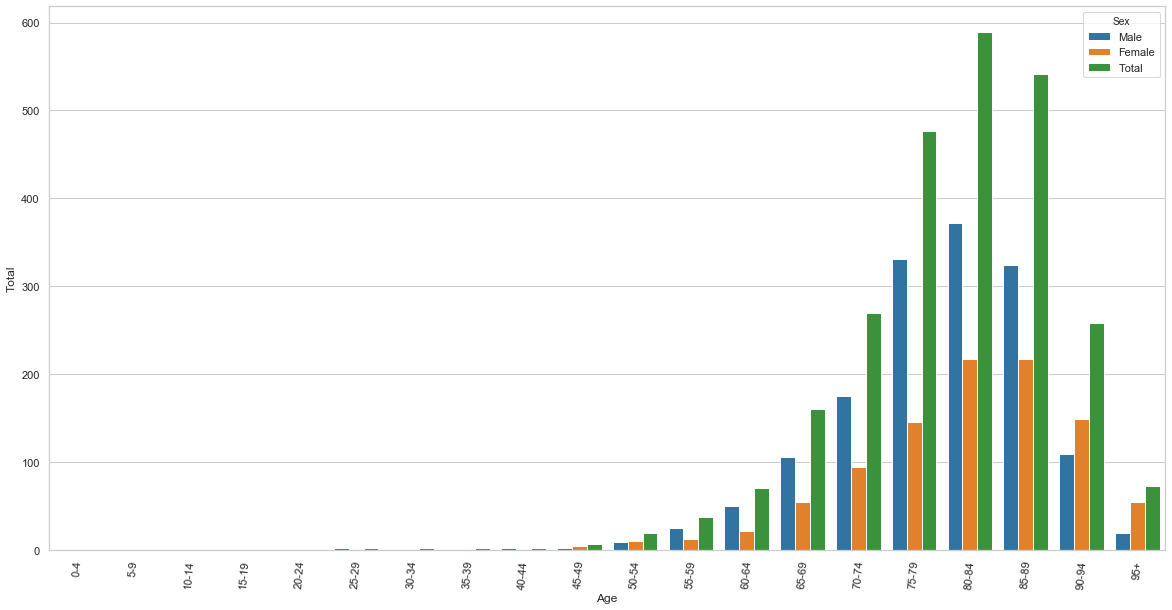

In [52]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
g1 = sns.barplot(y=df5.Total, x=df5.Age, hue=df5.Sex, data=df5, palette='tab10', ci=None)
ax.set(xlabel='Age', ylabel='Gender', title='Death Numbers of Covid-19 Cases by Gender and Age in the Netherlands')
plt.xticks(rotation=85)